In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data set with tab separated
data = pd.read_csv('/DataScienceNotes/Assignments/19-NLP/amazonreviews.tsv', sep='\t')

In [3]:
# featching few rows of data
data.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
# cehecking the data counts
data.shape

(10000, 2)

In [5]:
# getting information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [6]:
# checking the nuber of values in a column
data['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

blanced data of +ve and -ve reviews

#### Data Cleaning:

In [7]:
# checking any null values in the data set 
data.isna().sum()

label     0
review    0
dtype: int64

In [8]:
# checking any duplicates in the column
data[data['review'].duplicated()]

,label,review


no missing value and the duplicated rows find

In [9]:
# getting the single review
data.loc[0]['review']

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [10]:
# featuch the punctuations
puncts = string.punctuation
puncts

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
# replacing the punctuations with backspace
data['review'].str.replace('[{}]'.format(puncts), '')

0       Stuning even for the nongamer This sound track...
1       The best soundtrack ever to anything Im readin...
2       Amazing This soundtrack is my favorite music o...
3       Excellent Soundtrack I truly like this soundtr...
4       Remember Pull Your Jaw Off The Floor After Hea...
                              ...                        
9995    A revelation of life in small town America in ...
9996    Great biography of a very interesting journali...
9997    Interesting Subject Poor Presentation Youd be ...
9998    Dont buy The box looked used and it is obvious...
9999    Beautiful Pen and Fast Delivery The pen was sh...
Name: review, Length: 10000, dtype: object

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [13]:
# lemmatizing is a techniq where taking every word and cut it to the root form and put it back 
lem = WordNetLemmatizer() 
def lemmatize(x):
    lem_lst=[]
    lst = x.split()
    for word in lst:
        lem_lst.append(lem.lemmatize(word))
    return ' '.join(lem_lst)

In [14]:
# applying for every record
data['review'] =data['review'].apply(lemmatize)

In [15]:
# defining text cleaning function 
stop_words = set(stopwords.words('english'))
def remove_stopwords(x):
    lst = x.split()
    new_lst = [x for x in lst if x not in stop_words]
    return ' '.join(new_lst)

In [16]:
# applying it to every record and removing one by one
data['review'].apply(remove_stopwords)

0       Stuning even non-gamer: This sound track wa be...
1       The best soundtrack ever anything.: I'm readin...
2       Amazing!: This soundtrack favorite music time,...
3       Excellent Soundtrack: I truly like soundtrack ...
4       Remember, Pull Your Jaw Off The Floor After He...
                              ...                        
9995    A revelation life small town America early 190...
9996    Great biography interesting journalist: This b...
9997    Interesting Subject; Poor Presentation: You'd ...
9998    Don't buy: The box looked used obviously new. ...
9999    Beautiful Pen Fast Delivery.: The pen wa shipp...
Name: review, Length: 10000, dtype: object

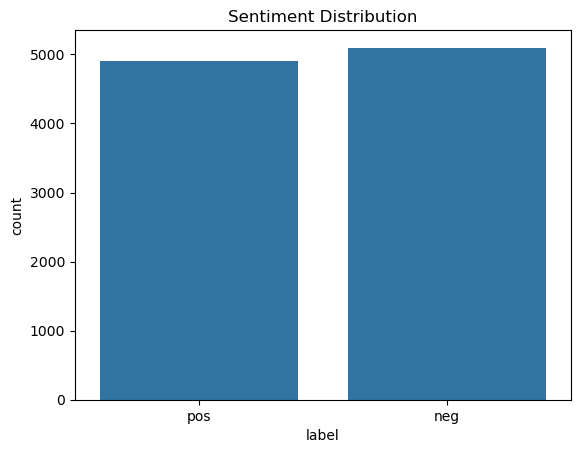

In [17]:
# sentiment Distribution
sns.countplot(data, x='label')
plt.title('Sentiment Distribution')
plt.show()


### using Monkey-Patch Numpy

To avoid all environment issues and works without downgrading or reinstalling anything.

used because I'm facing Numpy and Wordclod version incompatability

In [18]:
# Monkey-patch np.asarray to ignore unsupported 'copy' argument
_original_asarray = np.asarray

def _patched_asarray(a, dtype=None, order=None, *, copy=None):
    return _original_asarray(a, dtype=dtype, order=order)

np.asarray = _patched_asarray


#### Word Cloud Positive Reviews

In [19]:
positive_text = ' '.join(
    data[data['label'] == 'pos']['review']
)

In [20]:
from wordcloud import WordCloud
positive_wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200
).generate(positive_text)

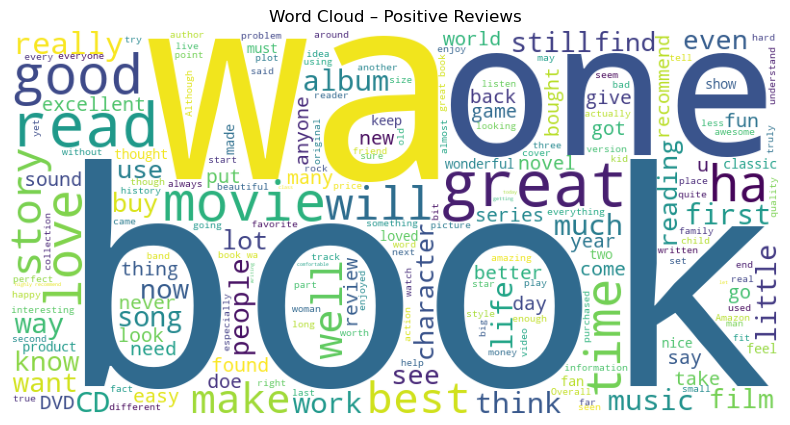

In [21]:
plt.figure(figsize=(10,5))
plt.imshow(positive_wc)
plt.axis('off')
plt.title('Word Cloud – Positive Reviews')
plt.show()

### Word Cloud Negative Reviews

In [22]:
negative_text = ' '.join(
    data[data['label'] == 'neg']['review']
)

In [23]:
negative_wc = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=200
).generate(negative_text)

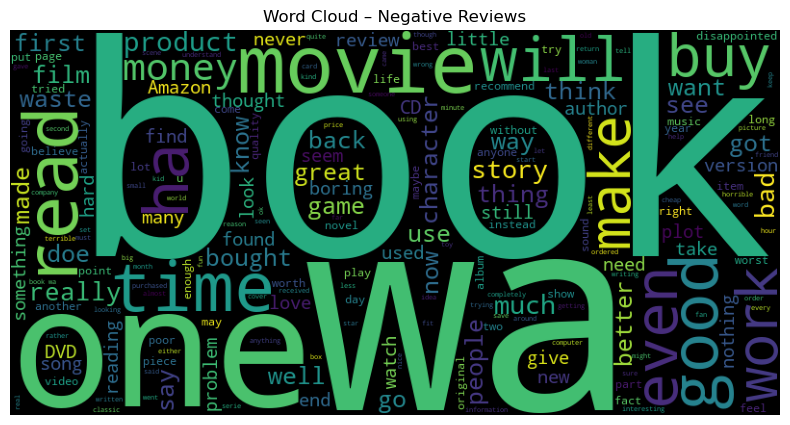

In [24]:
plt.figure(figsize=(10,5))
plt.imshow(negative_wc)
plt.axis('off')
plt.title('Word Cloud – Negative Reviews')
plt.show()


In [25]:
# encoding the label column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,1,A revelation of life in small town America in ...
9996,1,Great biography of a very interesting journali...
9997,0,Interesting Subject; Poor Presentation: You'd ...
9998,0,Don't buy: The box looked used and it is obvio...


In [26]:
# spliting the data
x = data['review']
y= data['label']

In [27]:
# converting the data into numeric using tfidf vectorizer to perform any model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
x_new = X.toarray()
x_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
# checking the reviews are converted
x_new.shape

(10000, 30801)

In [29]:
# Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
model = LogisticRegression()
model.fit(x_new, y)

LogisticRegression()

In [30]:
# predict 
ypred = model.predict(x_new)
ypred

array([1, 1, 1, ..., 0, 0, 1])

In [31]:
# getting score the accuracy
model.score(x_new, y)

0.9321

In [32]:
# concluding with confussion matrix
cm = confusion_matrix(y, ypred)
cm

array([[4772,  325],
       [ 354, 4549]], dtype=int64)

it's predicting well almost about 9300 are correctly classified

In [33]:
print(classification_report(y, ypred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5097
           1       0.93      0.93      0.93      4903

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



in the above steps making tfidf sepratly and sending that to the clasifier. so to avoid this two step

process making a pipline of this will reduce the effort and making use it with other models also made easy 

In [34]:
# creating a pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
# creating the setiment pipe line
sent_ppl = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lreg', LogisticRegression(max_iter=400) )
])

In [36]:
# build the  sentiment model
sent_ppl.fit(x, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lreg', LogisticRegression(max_iter=400))])

In [37]:
# predict 
sent_ppl.predict(x)

array([1, 1, 1, ..., 0, 0, 1])

In [38]:
# evaluating with texts
text = 'The product is amazing. Worth every penny'
sent_ppl.predict([text])

array([1])

In [39]:
text = 'Please don not buy this product. utter waste of money'
sent_ppl.predict([text])

array([0])

In [40]:
# checking the accuracy 
sent_ppl.score(x,y)

0.9321

In [41]:
# creating the SVM pipe line
from sklearn.svm import SVC
svm_ppl = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lreg', SVC(kernel="linear", random_state=42) )
])

In [42]:
# build the svm model
svm_ppl.fit(x,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lreg', SVC(kernel='linear', random_state=42))])

In [43]:
# accuracy of the model
svm_ppl.score(x,y)

0.9622

In [44]:
# evaluating with texts
text = 'The product is amazing. Worth every penny'
svm_ppl.predict([text])

array([1])

In [45]:
text = 'Please don not buy this product. utter waste of money'
svm_ppl.predict([text])

array([0])

In [46]:
# creating the Nural networks pipwline
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense
def create_model(meta):
    # 'meta' allows SciKeras to pass input shape automatically
    model = Sequential([
        Dense(64, input_shape=(meta["n_features_in_"],), activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

In [47]:
nn_classifier = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0)

In [48]:
# nural network pipeline
nn_ppl = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nn', nn_classifier)
])

In [49]:
# build nural network model
nn_ppl.fit(x, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('nn',
                 KerasClassifier(batch_size=32, epochs=10, model=<function create_model at 0x0000020E45F791C0>, verbose=0))])

In [50]:
# accuracy of the model
nn_ppl.score(x,y)

1.0

Both SVM and Nural Networks models are having good accuracy.